In [1]:
!gdown --id 1JU33EDoSsGr3pnJAC9uW1YEVFHR83iyc
!unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [3]:
BASE_DIR = '/content/UTKFace'

In [4]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/UTKFace/1_0_2_20161219194800523.jpg.c...,1,0
1,/content/UTKFace/25_1_2_20170116175319780.jpg....,25,1
2,/content/UTKFace/27_1_2_20170116163552814.jpg....,27,1
3,/content/UTKFace/37_1_2_20170116184911351.jpg....,37,1
4,/content/UTKFace/29_1_0_20170104165932577.jpg....,29,1


In [6]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

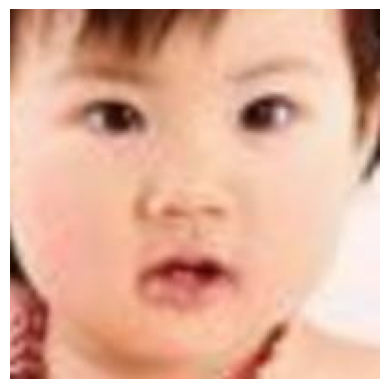

In [7]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

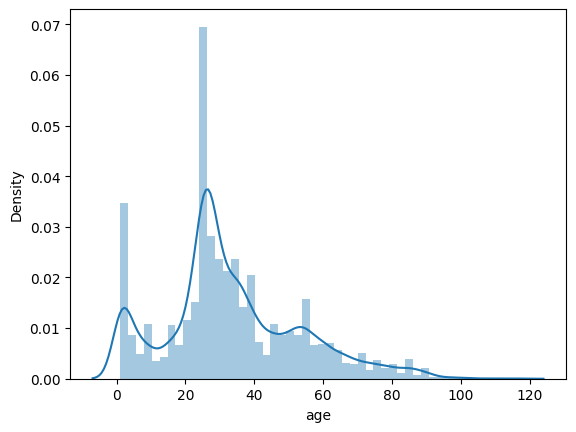

In [8]:
sns.distplot(df['age'])

<Axes: ylabel='count'>

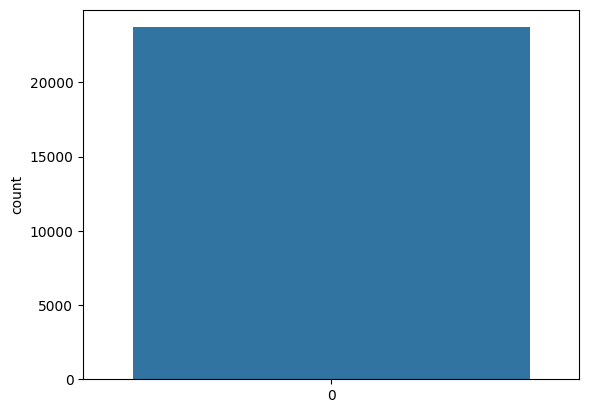

In [9]:
sns.countplot(df['gender'])

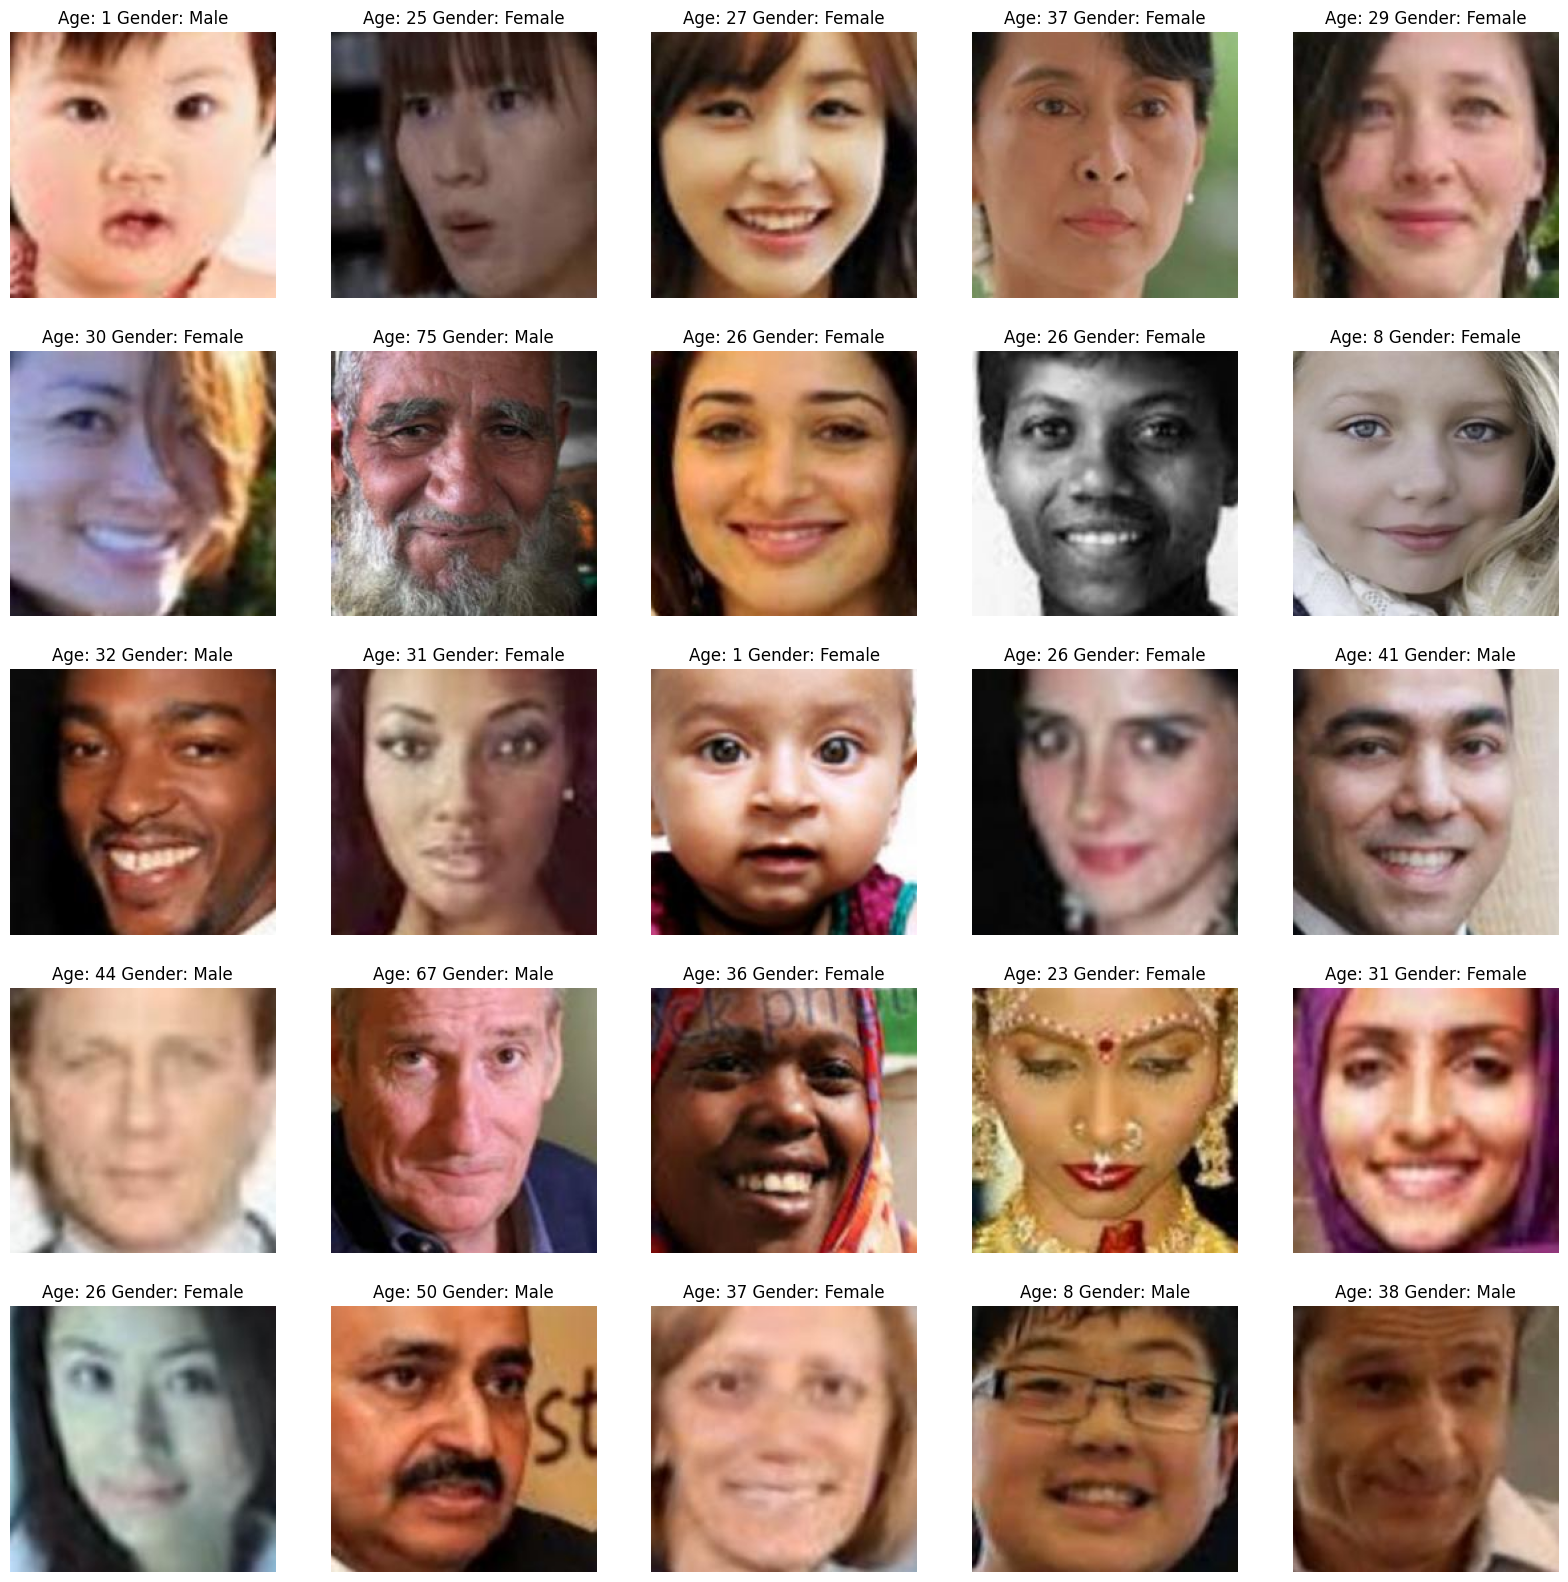

In [10]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [12]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [13]:
# normalize the images
X = X/255.0

In [14]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [15]:
input_shape = (128, 128, 1)

In [16]:

inputs = Input((input_shape))
conv1 = Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv1')(inputs)
conv2 = Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv2')(conv1)
maxp1 = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool')(conv2)

conv3 = Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv1')(maxp1)
conv4 = Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv2')(conv3)
maxp2 = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool')(conv4)

conv5 = Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv1')(maxp2)
conv6 = Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv2')(conv5)
conv7 = Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv3')(conv6)
maxp3 = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block3_maxpool')(conv7)

conv8 = Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv1')(maxp3)
conv9 = Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv2')(conv8)
conv10 = Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv3')(conv9)
maxp4 = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block4_maxpool')(conv10)

conv11 = Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv1')(maxp4)
conv12 = Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv2')(conv11)
conv13 = Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv3')(conv12)
conv14 = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_maxpool')(conv13)

flatten = Flatten()(conv14)
dense1 = Dense(4096, activation='relu')(flatten)
dense2 = Dense(4096, activation='relu')(flatten)
dense3 = Dense(4096, activation='relu')(dense1)
dense4 = Dense(4096, activation='relu')(dense2)

output1 = Dense(1, activation='sigmoid', name='gender_out') (dense3)
output2 = Dense(1, activation='relu', name='age_out') (dense4)

model = Model(inputs=[inputs], outputs=[output1, output2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])


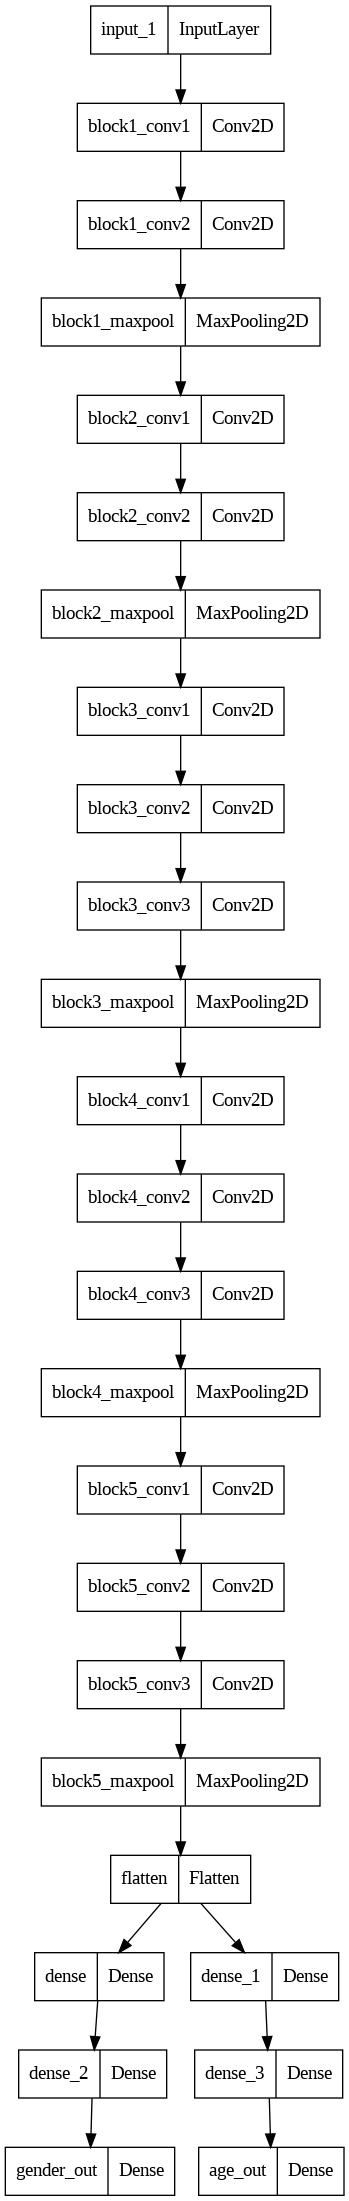

In [17]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [19]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=2, validation_split=0.2)

Epoch 1/2
593/593 [==============================] - 132s 192ms/step - loss: 76.4206 - gender_out_loss: 17.3584 - age_out_loss: 59.0622 - gender_out_accuracy: 0.5188 - age_out_accuracy: 0.0450 - val_loss: 15.7098 - val_gender_out_loss: 0.6918 - val_age_out_loss: 15.0180 - val_gender_out_accuracy: 0.5215 - val_age_out_accuracy: 0.0538
Epoch 2/2
593/593 [==============================] - 107s 180ms/step - loss: 15.8356 - gender_out_loss: 0.6928 - age_out_loss: 15.1428 - gender_out_accuracy: 0.5209 - age_out_accuracy: 0.0458 - val_loss: 16.3634 - val_gender_out_loss: 0.6964 - val_age_out_loss: 15.6670 - val_gender_out_accuracy: 0.5215 - val_age_out_accuracy: 0.0538


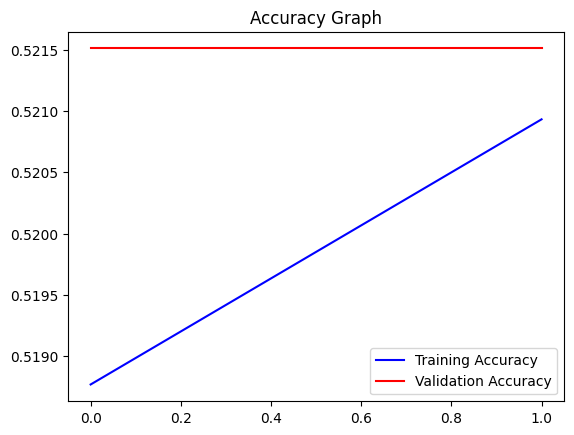

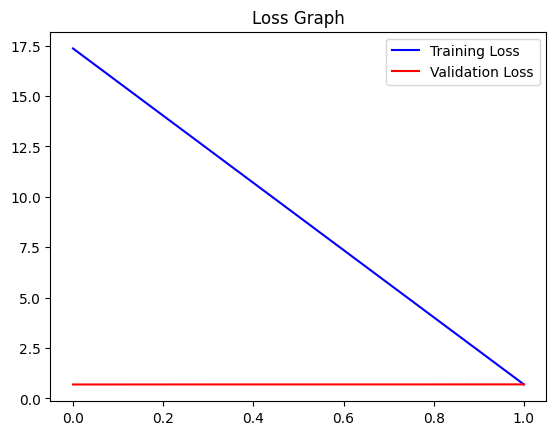

In [20]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

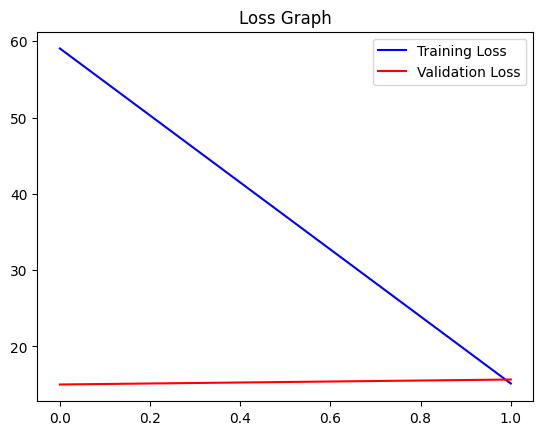

In [21]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 32
1/1 [==============================] - 0s 97ms/step
Predicted Gender: Male Predicted Age: 34


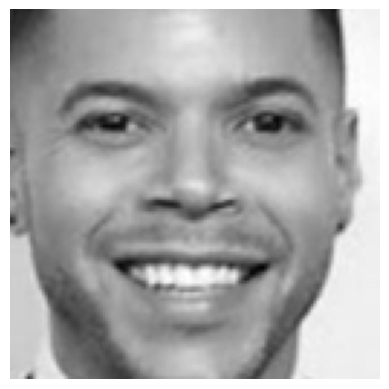

In [30]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 23
1/1 [==============================] - 0s 18ms/step
Predicted Gender: Male Predicted Age: 35


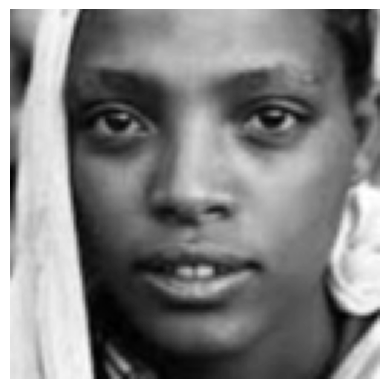

In [23]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 32
1/1 [==============================] - 0s 17ms/step
Predicted Gender: Male Predicted Age: 34


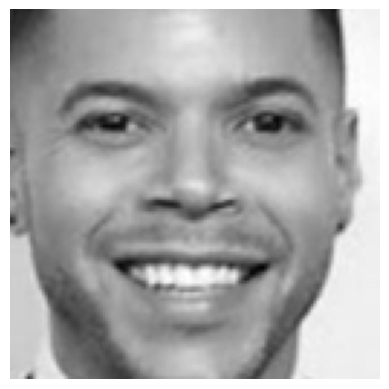

In [24]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

##Demo

In [25]:
test = '/content/385544180_326090853702377_4175529590943590625_n.jpg'
features = []
img = load_img(test, grayscale=True)
img = img.resize((128, 128), Image.ANTIALIAS)
img = np.array(img)
features.append(img)
features = np.array(features)
features = features.reshape(len(features), 128, 128, 1)
features = features/255
# predict from model
pred = model.predict(features.reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(features.reshape(128, 128), cmap='gray');

FileNotFoundError: ignored